In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

# PaddleHub作业
## 1.作业描述
作业内容及说明：

* 题目1（必做）：查看项目中Paddle、PaddleHub版本及模型信息（20分）
* 题目2 （必做） ：完成1个一键预测任务（20分）
* 题目3 （必做） ：完成1个迁移学习任务（30分）
* 题目4 （必做） ：完成1个demo服务化部署任务（30分）
* 题目5 （选做） ：完成一个AI创意项目，主题不限制，应用hub+能力（40分）

## 2.PaddleHub说明
PaddleHub就是为了解决对深度学习模型的需求而开发的工具。
基于飞桨领先的核心框架，精选效果优秀的算法，提供了百亿级大数据训练的预训练模型，方便用户不用花费大量精力从头开始训练一个模型。

**详见[paddlehub](https://www.paddlepaddle.org.cn/hub)**

# 3. 作业实现
## 3.1 查看项目中Paddle、PaddleHub版本及模型信息


In [1]:
#安装PaddlePaddle以及PaddleHub,因为AiStudio中默认已经安装了pp环境，所以不再重复安装，仅安装paddlehub
import paddle
!pip install paddlehub==1.6.2 -i https://pypi.tuna.tsinghua.edu.cn/simple
#输出当前paddle版本以及Paddlehub版本
print('paddle的版本:')
! paddle --version
#输出paddlehub的版本
import paddlehub as hub
print('paddlehub的版本: ')
!hub version
# 输出模型信息,见3.2.2
# print(f'采用的预训练模型为：{module.name}')

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 207 kB 5.2 MB/s            
  Attempting uninstall: paddlehub
    Found existing installation: paddlehub 2.0.4
    Uninstalling paddlehub-2.0.4:
      Successfully uninstalled paddlehub-2.0.4
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.
paddle的版本:
/opt/conda/envs/python35-paddle120-env/bin/paddle: 第 47 行: [: -eq: 需要一元表达式
PaddlePaddle 2.2.2, compiled with
    with_avx: ON
    with_gpu: OFF
    with_mkl: ON
    with_mkldnn: ON
    with_python: ON


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/nltk/lm/vocabulary.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Counter, Iterable


paddlehub的版本: 
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/nltk/lm/vocabulary.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.

## 3.2 完成1个一键预测任务
此作业参照动物图像预测的示例，人为从网上找了几张图片，存储到用户目录下，并基于这些图片进行预测。

### 3.2.1 数据集下载

In [2]:
%cd data/
!mkdir my_test_pic
%cd my_test_pic/
!wget https://p9.itc.cn/q_70/images03/20210821/9dc51a99c3b843f48643afc4fe5dffac.jpeg
!wget https://pic.ntimg.cn/file/20150303/7487939_221629182000_2.jpg
!wget http://p3.itc.cn/q_70/images03/20200712/58979419a9ec4003adcc39700fcce3cb.png
!wget https://pics6.baidu.com/feed/5ab5c9ea15ce36d3f5a1f4aab13c5681eb50b1dc.jpeg?token=880d200288320f1f3171e01cb9036b77
!wget https://inews.gtimg.com/newsapp_bt/0/14024669637/1000

/home/aistudio/data
/home/aistudio/data/my_test_pic
--2022-03-28 19:45:03--  https://p9.itc.cn/q_70/images03/20210821/9dc51a99c3b843f48643afc4fe5dffac.jpeg
正在解析主机 p9.itc.cn (p9.itc.cn)... 122.188.38.83, 116.211.184.189, 2408:8678:e0:0:70::19, ...
正在连接 p9.itc.cn (p9.itc.cn)|122.188.38.83|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 101268 (99K) [image/jpeg]
正在保存至: “9dc51a99c3b843f48643afc4fe5dffac.jpeg”

9dc51a99c3b843f4864 100%[===================>]  98.89K  --.-KB/s    in 0.1s    

2022-03-28 19:45:03 (661 KB/s) - 已保存 “9dc51a99c3b843f48643afc4fe5dffac.jpeg” [101268/101268])

--2022-03-28 19:45:03--  https://pic.ntimg.cn/file/20150303/7487939_221629182000_2.jpg
正在解析主机 pic.ntimg.cn (pic.ntimg.cn)... 119.36.226.229, 58.49.224.62, 58.49.137.188, ...
正在连接 pic.ntimg.cn (pic.ntimg.cn)|119.36.226.229|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 786906 (768K) [image/jpeg]
正在保存至: “7487939_221629182000_2.jpg”

7487939_22162918200 100%[===================>] 768.46K  --.-KB/s    in 0.1s    

202

In [3]:
# 将下载的图片重新命名
import os, sys
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

path = "./"
dirs = os.listdir(path)
test_img_path = []
id = 0
# This would print all the files and directories
for f in dirs:
    if not f.startswith('.'):
        print(f)
        name = str(id+1) + '.jpg'
        print(name)
        os.rename(f, name)
        test_img_path.append(os.path.join('./',name))
        id += 1
print(test_img_path)


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


1000
1.jpg
58979419a9ec4003adcc39700fcce3cb.png
2.jpg
7487939_221629182000_2.jpg
3.jpg
5ab5c9ea15ce36d3f5a1f4aab13c5681eb50b1dc.jpeg?token=880d200288320f1f3171e01cb9036b77
4.jpg
9dc51a99c3b843f48643afc4fe5dffac.jpeg
5.jpg
['./1.jpg', './2.jpg', './3.jpg', './4.jpg', './5.jpg']


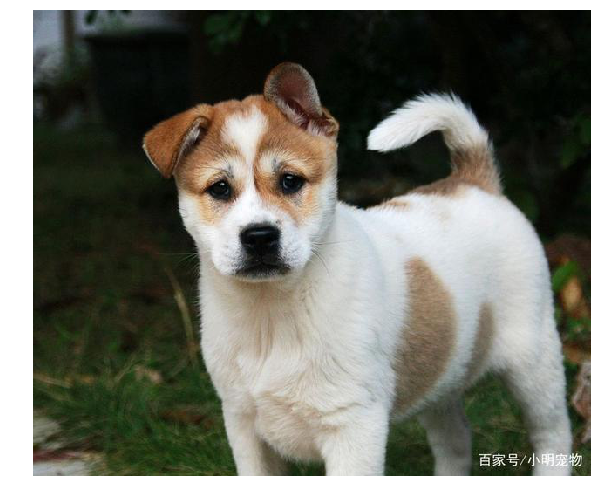

In [13]:
# 展示其中第4张图片
img1 = mpimg.imread(test_img_path[3]) 
plt.figure(figsize=(10,10))
plt.imshow(img1) 
plt.axis('off') 
plt.show()  

### 3.2.2加载预训练模型
当前选择ResNet模型

**模型概述**

ResNet-vd 其实就是 ResNet-D，是ResNet 原始结构的变种，可用于图像分类和特征提取。该 PaddleHub Module 采用百度自建动物数据集训练得到，支持7978种动物的分类识别。

In [9]:
module = hub.Module(name="resnet50_vd_animals")


[2022-03-28 20:04:32,556] [    INFO] - Installing resnet50_vd_animals module
[2022-03-28 20:04:33,001] [    INFO] - Module resnet50_vd_animals already installed in /home/aistudio/.paddlehub/modules/resnet50_vd_animals


In [20]:
# 输出模型信息
print(f'采用的预训练模型为：{module.name}')


采用的预训练模型为：resnet50_vd_animals


### 3.2.3数据预测
基于PaddleHub中提供的动物图像分类识别模型“resnet",使用classification进行分类。直接基于预训练的renet动物模型，预测结果还是挺准的

*reference案例：[paddleHub动物一键预测](https://aistudio.baidu.com/ibdcpu7/user/1144314/3700437/notebooks/3700437.ipynb)


In [11]:
import cv2
my_images =[cv2.imread(image_path) for image_path in test_img_path]
results = module.classification(images=my_images)
ID= 0 
for result in results:
    print(result)



{'环颈雉': 0.7461119294166565}
{'哈士奇犬': 0.9301246404647827}
{'狮子': 0.9867557287216187}
{'杰克罗素梗': 0.49006906151771545}
{'国宝大熊猫': 0.9870770573616028}


## 3.3 完成1个迁移学习任务

### 3.3.1定义风格
选择网上一个照片，作为目标风格，并将图片集中的图片按照目标风格进行迁移。梵高图片示意如下：

In [42]:
import matplotlib.image as mpimg
%cd ..
!mkdir my_style_pic
%cd my_style_pic/
!wget http://qqpublic.qpic.cn/qq_public/0/0-3015798271-3C2C4679075E545147D83FC48762CD71/0?fmt=jpg&size=97&h=500&w=750&ppv=1.jpg
!wget http://www.kjqss.com/uploads/allimg/191224/1609414I4-2.jpg
!mv 0?fmt\=jpg art_style.jpg
!mv 1609414I4-2.jpg baiduK1.jpg
dir = os.listdir('./')
for pic in dir:
    if pic.startswith('art'):
        img = mpimg.imread(pic) 
        plt.figure(figsize=(10,10))
        plt.imshow(img) 
        plt.axis('off') 
        plt.show()

In [40]:
#定义风格如下：
stylepro_artistic = hub.Module(name="stylepro_artistic")

[2022-03-28 20:25:49,336] [    INFO] - Installing stylepro_artistic module


[==================================================] 100.00%
Uncompress /home/aistudio/.paddlehub/tmp/tmprufq031r/stylepro_artistic
[==================================================] 100.00%


[2022-03-28 20:25:52,849] [    INFO] - Successfully installed stylepro_artistic-1.0.1


In [44]:
results = stylepro_artistic.style_transfer(images=[{
        'content': cv2.imread('./baiduK1.jpg'),
        'styles': [cv2.imread('./art_style.jpg')]}],
        alpha = 1.0,
        visualization = True)

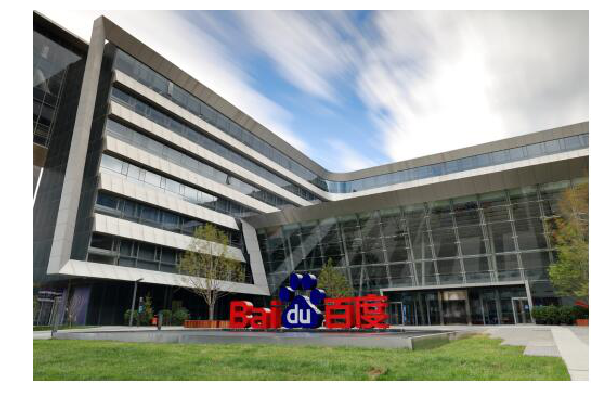

In [43]:
# 未进行风格前的科技园K1原始图片如下所示：
origin_img_path = "./baiduK1.jpg"
img = mpimg.imread(origin_img_path)
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()

### 3.3.2 进行风格迁移
基于定义的艺术风格（PaddleHub中提供的预训练模型），进行风格迁移，结果如下：


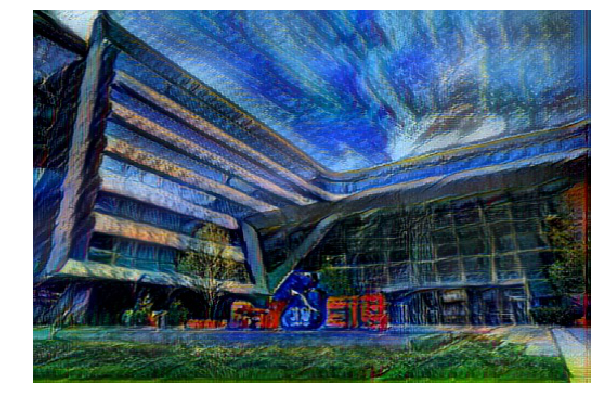

In [45]:
# 预测结果展示
test_img_path = "./transfer_result/ndarray_1648470895.0710132.jpg"
img = mpimg.imread(test_img_path)
# 展示预测结果图片
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()

## 3.4 完成1个demo服务化部署任务
TODO


In [4]:
!hub serving start -m resnet50_vd_animals -p 8866

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/nltk/lm/vocabulary.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is depreca

In [52]:
# %cd~
%cd data/my_test_pic/


/home/aistudio/data/my_test_pic


In [8]:
# 完成服务器部署后，client可以访问server进行预测
!touch predict.py
#客户端也尝试用pycharm，无法链接网络。


In [ ]:
import requests
import json
import cv2
import base64

def cv2_to_base64(image):
    data = cv2.imencode('.jpg', image)[1]
    return base64.b64encode(data.tostring()).decode('utf8')


# 发送HTTP请求
data = {'images':[cv2_to_base64(cv2.imread('./2.jpg'))]}
headers = {"Content-type": "application/json"}
url = "http://127.0.0.1:8866/predict/resnet50_vd_animals"
r = requests.post(url=url, headers=headers, data=json.dumps(data))

# 打印预测结果
print(r.json()["results"])

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 